In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("sales_data_sample.csv", encoding='latin1')
print(df.head())


   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 rue de l'Abbaye           NaN

In [6]:
print("\nDataset info:")
print(df.info())


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-n

In [7]:
print("\nMissing values:")
print(df.isna().sum())


Missing values:
ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64


In [8]:
df = df.dropna()

In [11]:
# Convert ORDERDATE to datetime
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

In [13]:
# Check unique values and datatype of POSTALCODE
print(df['POSTALCODE'].dtype)
print(df['POSTALCODE'].unique()[:10])  # Just to inspect the first few

object
['3004' '2067' '2060']


In [14]:
# Try converting POSTALCODE to numeric, set errors='coerce' to turn invalids into NaN
df['POSTALCODE'] = pd.to_numeric(df['POSTALCODE'], errors='coerce')

In [15]:
# Now fill missing values with median
postal_median = np.nanmedian(df['POSTALCODE'])
df['POSTALCODE'] = df['POSTALCODE'].fillna(postal_median)

In [16]:
# Drop unnecessary columns
columns_to_drop = [
    'PHONE', 'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE',
    'CONTACTLASTNAME', 'CONTACTFIRSTNAME'
]
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])


In [17]:
# Convert STATUS to numeric (helps in groupby or plotting if needed)
df['STATUS'] = df['STATUS'].astype('category').cat.codes

In [18]:
# Reset index just in case
df.reset_index(drop=True, inplace=True)

In [19]:
print("\n--- Basic Statistics ---")
print("Mean sales:", np.mean(df['SALES']))
print("Median sales:", np.median(df['SALES']))
print("Standard deviation of price each:", np.std(df['PRICEEACH']))



--- Basic Statistics ---
Mean sales: 3446.003537414966
Median sales: 3160.74
Standard deviation of price each: 19.829461611672247


In [20]:
# Groupby: Average sales by year
yearly_sales = df.groupby('YEAR_ID')['SALES'].mean()
print("\nAverage Sales per Year:")
print(yearly_sales)


Average Sales per Year:
YEAR_ID
2003    3413.784808
2004    3493.045397
2005    3405.745312
Name: SALES, dtype: float64


In [21]:
# Filtering: High value orders (SALES > 10000)
high_value_orders = df[df['SALES'] > 10000]
print("\nNumber of High Value Orders (> $10,000):", len(high_value_orders))


Number of High Value Orders (> $10,000): 0


In [22]:
pivot = pd.pivot_table(df,
                       index='YEAR_ID',
                       columns='STATUS',
                       values='SALES',
                       aggfunc='mean')
print("\nAverage Sales by Year and Status:")
print(pivot)


Average Sales by Year and Status:
STATUS             0            1
YEAR_ID                          
2003             NaN  3413.784808
2004             NaN  3493.045397
2005     3382.417692  3421.706316


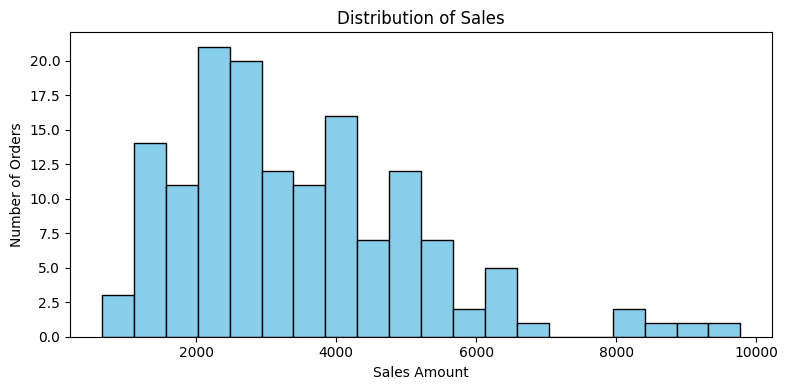

In [23]:
plt.figure(figsize=(8, 4))
plt.hist(df['SALES'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Sales')
plt.xlabel('Sales Amount')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()


<ipython-input-24-d9194ef5792c>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='DEALSIZE', y='SALES', data=df, estimator=np.mean, ci=None)


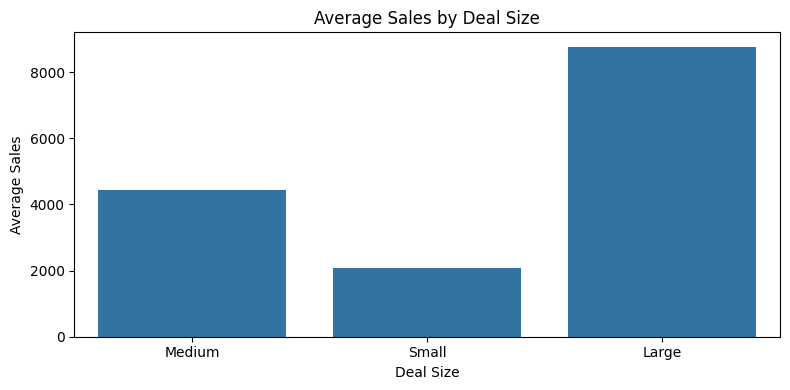

In [24]:
plt.figure(figsize=(8, 4))
sns.barplot(x='DEALSIZE', y='SALES', data=df, estimator=np.mean, ci=None)
plt.title('Average Sales by Deal Size')
plt.xlabel('Deal Size')
plt.ylabel('Average Sales')
plt.tight_layout()
plt.show()


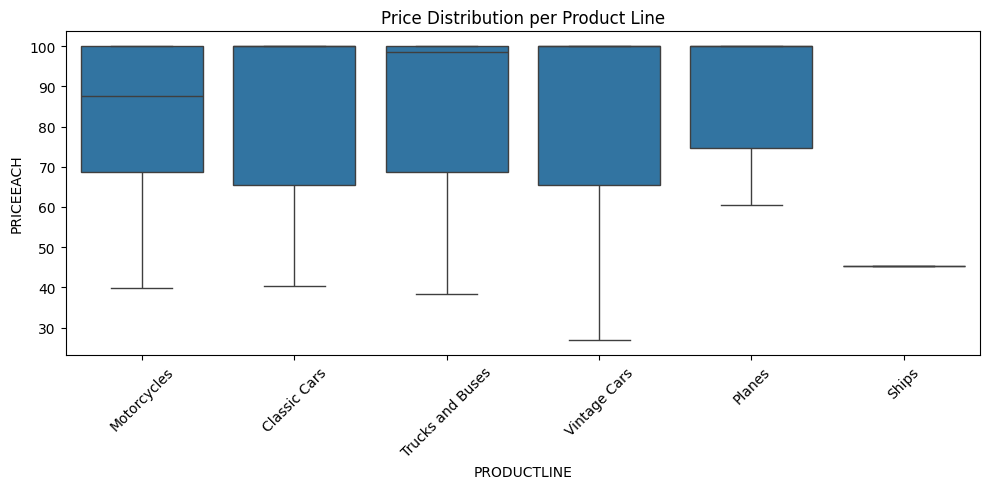

In [25]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='PRODUCTLINE', y='PRICEEACH', data=df)
plt.title('Price Distribution per Product Line')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [27]:
sales_array = df['SALES'].values


In [28]:
print("Mean Sales:", np.mean(sales_array))
print("Median Sales:", np.median(sales_array))
print("Standard Deviation of Sales:", np.std(sales_array))
print("Maximum Sale:", np.max(sales_array))
print("Minimum Sale:", np.min(sales_array))

Mean Sales: 3446.003537414966
Median Sales: 3160.74
Standard Deviation of Sales: 1712.1353632479197
Maximum Sale: 9774.03
Minimum Sale: 652.35


In [29]:
above_avg_sales = sales_array[sales_array > np.mean(sales_array)]
print("Number of sales above average:", len(above_avg_sales))

Number of sales above average: 64


In [30]:
avg_sales_by_product = df.groupby('PRODUCTLINE')['SALES'].mean().sort_values(ascending=False)
print("Average Sales by Product Line:")
print(avg_sales_by_product)

Average Sales by Product Line:
PRODUCTLINE
Trucks and Buses    3667.831111
Vintage Cars        3546.999487
Classic Cars        3518.923043
Motorcycles         3430.757727
Planes              3036.766190
Ships               1089.360000
Name: SALES, dtype: float64


In [31]:
total_quantity_by_year = df.groupby('YEAR_ID')['QUANTITYORDERED'].sum()
print("\nTotal Quantity Ordered by Year:")
print(total_quantity_by_year)



Total Quantity Ordered by Year:
YEAR_ID
2003    1731
2004    2138
2005    1127
Name: QUANTITYORDERED, dtype: int64


In [32]:
pivot_sales = pd.pivot_table(df,
                              index='COUNTRY',
                              columns='YEAR_ID',
                              values='SALES',
                              aggfunc='sum')
print("\nPivot Table: Sales by Country and Year:")
print(pivot_sales.head())



Pivot Table: Sales by Country and Year:
YEAR_ID         2003       2004       2005
COUNTRY                                   
Australia  177516.81  220061.86  108983.85


In [33]:
pivot_price = pd.pivot_table(df,
                              index='PRODUCTLINE',
                              columns='DEALSIZE',
                              values='PRICEEACH',
                              aggfunc='mean')
print("\nPivot Table: Avg Price Each by Product Line and Deal Size:")
print(pivot_price)



Pivot Table: Avg Price Each by Product Line and Deal Size:
DEALSIZE          Large     Medium      Small
PRODUCTLINE                                  
Classic Cars        NaN  96.583077  69.102000
Motorcycles       100.0  96.433333  72.959286
Planes              NaN  93.693636  81.732000
Ships               NaN        NaN  45.390000
Trucks and Buses  100.0  99.648889  67.482500
Vintage Cars      100.0  98.172632  65.546111


<ipython-input-34-ee6d530638b8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_sales_by_product.index, y=avg_sales_by_product.values, palette="viridis")


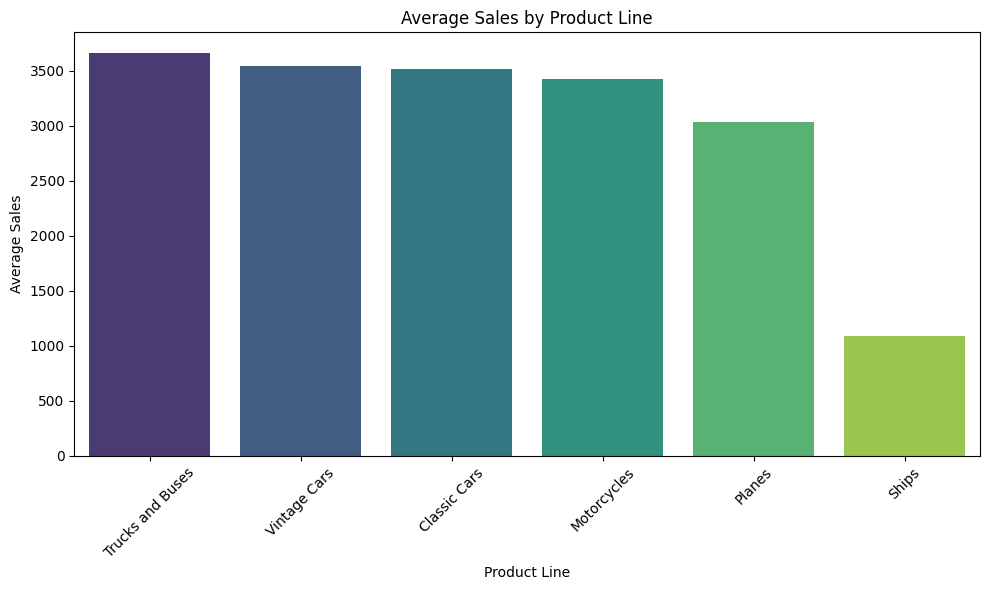

In [34]:
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_sales_by_product.index, y=avg_sales_by_product.values, palette="viridis")
plt.title("Average Sales by Product Line")
plt.ylabel("Average Sales")
plt.xlabel("Product Line")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

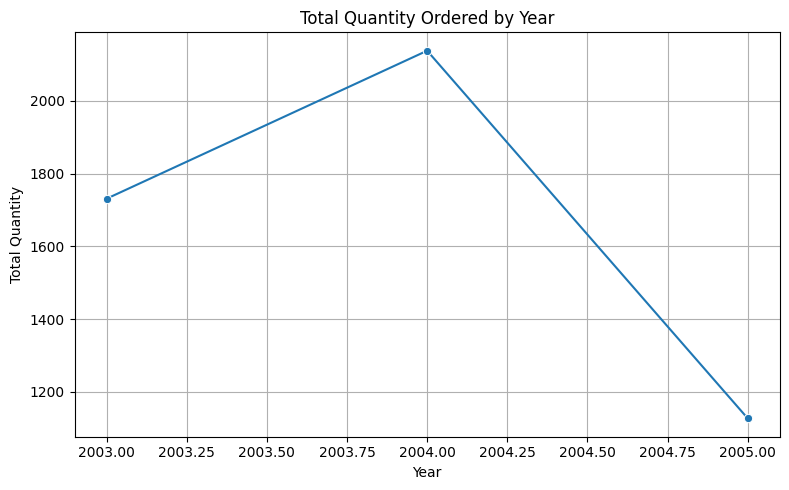

In [35]:
plt.figure(figsize=(8, 5))
sns.lineplot(x=total_quantity_by_year.index, y=total_quantity_by_year.values, marker='o')
plt.title("Total Quantity Ordered by Year")
plt.xlabel("Year")
plt.ylabel("Total Quantity")
plt.grid(True)
plt.tight_layout()
plt.show()


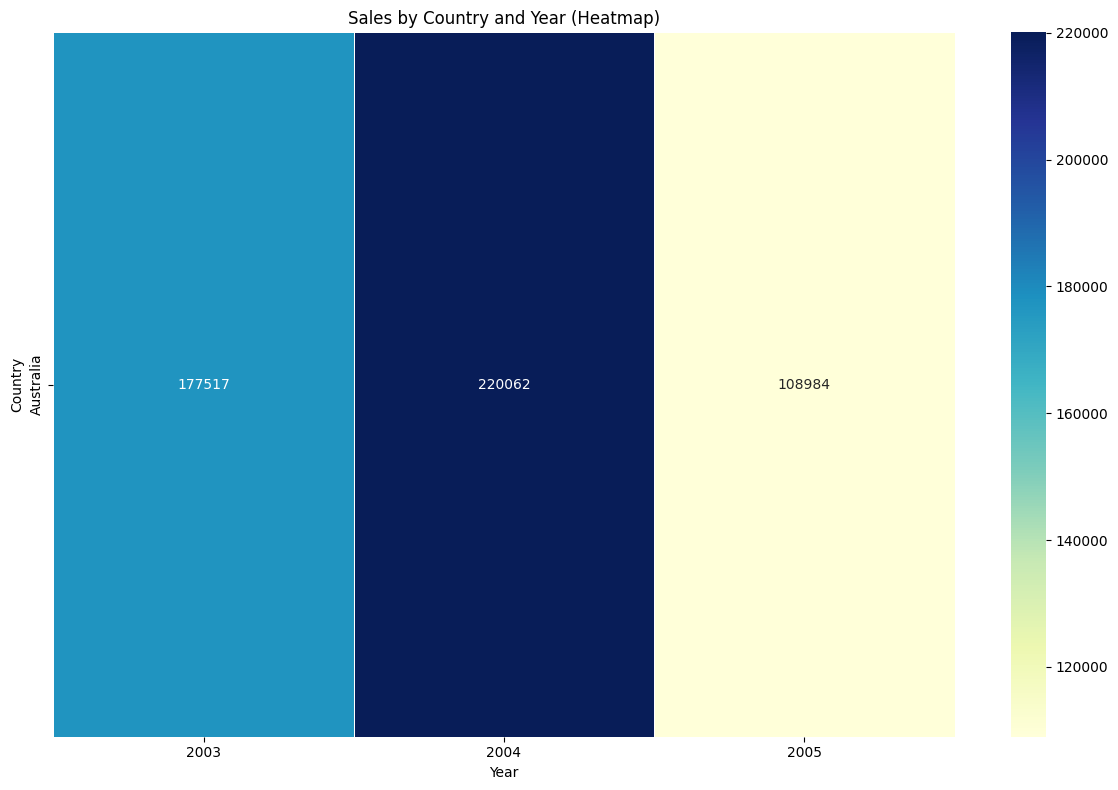

In [36]:
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_sales, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=.5)
plt.title("Sales by Country and Year (Heatmap)")
plt.ylabel("Country")
plt.xlabel("Year")
plt.tight_layout()
plt.show()

In [37]:
df['PROFIT'] = df['SALES'] - (df['QUANTITYORDERED'] * 70)


In [38]:
top_customers = df.groupby('CUSTOMERNAME')['PROFIT'].sum().sort_values(ascending=False).head(5)
print("Top 5 Customers by Profit:")
print(top_customers)


Top 5 Customers by Profit:
CUSTOMERNAME
Australian Collectors, Co.    66175.41
Anna's Decorations, Ltd       51166.13
Souveniers And Things Co.     39500.98
Name: PROFIT, dtype: float64


In [39]:
df.to_csv("cleaned_sales_data.csv", index=False)


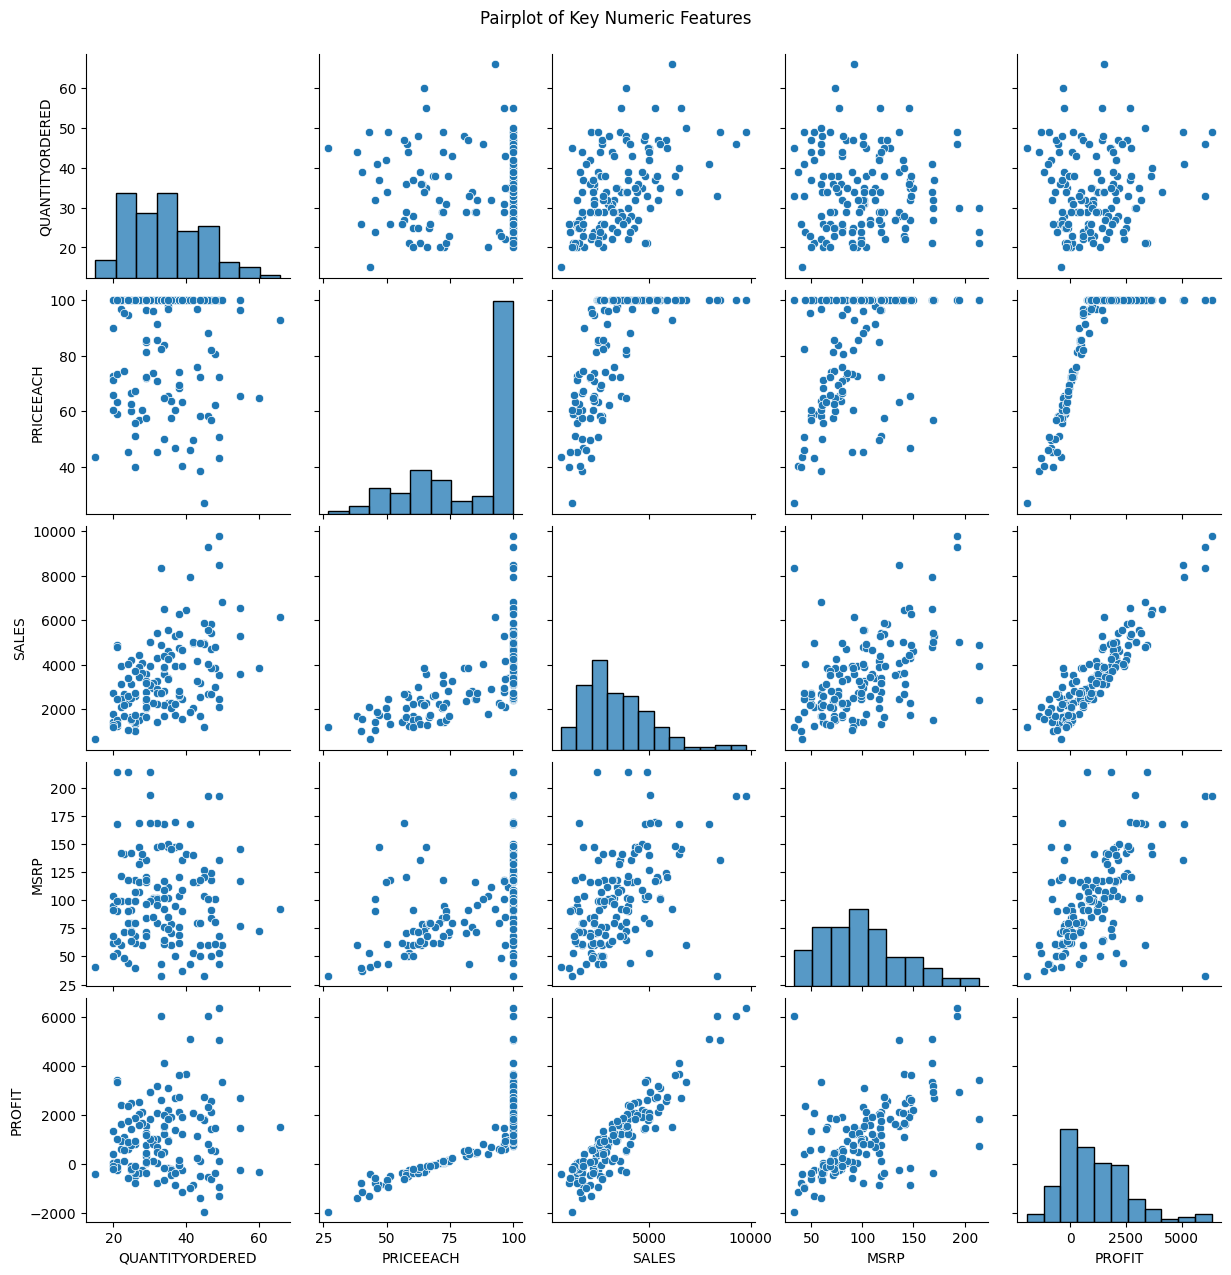

In [40]:
numeric_cols = ['QUANTITYORDERED', 'PRICEEACH', 'SALES', 'MSRP', 'PROFIT']
sns.pairplot(df[numeric_cols])
plt.suptitle("Pairplot of Key Numeric Features", y=1.02)
plt.show()
